# TITANIC DATA ANALYSIS PROJECT 

INTRODUCTION:

The titanic ship is a british luxury passengers line that sank on april 15, 1912. en route to new york from southampton , england on its maiden voyage. the largest and most luxurious ship afloat and was considered unsinkable. shortly, before midnight on april 14, it collided with an iceberg and was ruptured and sank. therefore, i will be carrying out a project base analysis on the titanic dataset downlaoded from kaggle to answer the following questions: 
i. who were the passengers onboard titanic ship?  ii. what deck were passengers on?  iii. where the passengers come from?   iv. who are those alone and who are those with family?  v. what factors effects the chances of surviving?   vi. Did  having a family member increases the chances of survival?   vii.Did the deck have a chance on passengers survival rate? 

# Data inspection

In [227]:
#importing neccessary libraries for data manipulation and visualisation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
%matplotlib inline

In [228]:
titanic_df = pd.read_csv('train.csv')

In [229]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [230]:
titanic_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [231]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [232]:
titanic_df.shape

(891, 12)

In [233]:
titanic_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [234]:
titanic_df.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [235]:
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [236]:
titanic_df.isnull().count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            891
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          891
Embarked       891
dtype: int64

From the data inspection done, it seen that the dataset has 12 columns and 891 rows. the columns names are explained below:
i. Passengersid: these are unique id's that identifies each passengers ii. Survived: 0=never suvived, 1=survived iii. Pclass: means passengers class (1, 2 or 3) iv. Sibsp: means number of siblings/spouse onboard the titanic v. Parch: means number of parents/children onboard the titanic vi. Ticket: means ticket number vii. Cabin: means cabin number, where the passengers stays viii. Embarked: means the location where the passengers board the titanic(C=cherbourg, Q= queenstown, S=southampton).
    It can also be seen that the columns are formated correctly, however Age(object) has 177 NaN and will be replaced with 'Missing', Cabin(object) has 687 NaN and will be replaced with 'Missing', Embarked(float) has 2 NaN and will be replaced with '0'.

# Insight from quick statistics on the dataset

In [237]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


From the quick statistics on the value columns the following insight was derived:

     1.The mean of the Survived column is 0.38 which means that on average about 38% people survived and 62% died.
       Therefore,more people died than survived.
  
     2.The average age of the passengers were 29years, minimum age was about 4months and the maximum age was 80years.
  
     3.The count of the age column is not consistent with the others. Therefore, about 177 nulll values should be noted.

# 1. Who were the passengers onboard titanic ship? 

<AxesSubplot:xlabel='Sex', ylabel='count'>

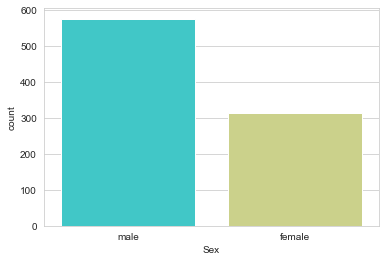

In [238]:
# looking at the passengers with respect to sex
sns.set_style('whitegrid')
sns.countplot(x='Sex', data=titanic_df, palette='rainbow')

There are more male passengers as compared to females onboard the Titanic

<AxesSubplot:xlabel='Sex', ylabel='count'>

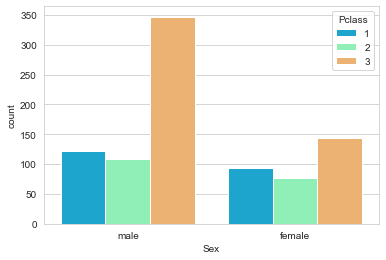

In [239]:
# looking at the sex distrbution into the difference classes.
sns.set_style('whitegrid')
sns.countplot(x ='Sex', data =titanic_df, hue ='Pclass', palette ='rainbow')

There are more passengers in class 3, and more male as well

<AxesSubplot:xlabel='Pclass', ylabel='count'>

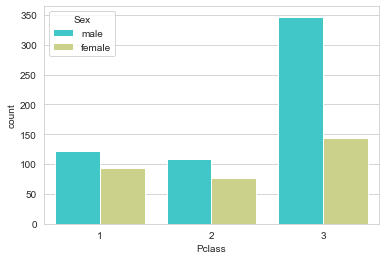

In [240]:
# plot of passengers by gender 
sns.set_style('whitegrid')
sns.countplot(x='Pclass', data =titanic_df, hue='Sex', palette='rainbow')

I also split the passengers by gender, and also by the class they are in. Then found out that, there are more than 50% males in class 3.

In [241]:
# defined a function 'child_female_male = passenger = 2 columns i.e Age and Sex', 
#to show not just sex but male/female and children

def child_female_male(passenger):
    age,sex = passenger
    
    if age<16 and sex=='male':
        return 'male_child'
    elif age<16 and sex=='female':
            return 'female_child'
    else:
        return sex

The function above was defined to identify and categories children below the age of 16. By using the .apply() method together with the Sex and Age column, to create a new column called “Person”. So that, we can break down the passengers into 4 different categories (male, male_child, female and female_child).

In [242]:
# apply the function and create a new column
titanic_df['Person'] = titanic_df[['Age','Sex']].apply(child_female_male, axis=1)
titanic_df.head(10)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,male_child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,female_child


<AxesSubplot:xlabel='Pclass', ylabel='count'>

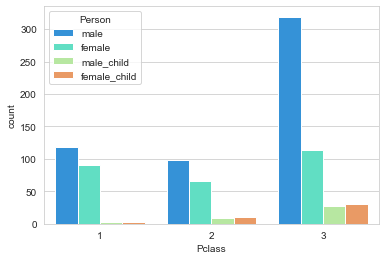

In [243]:
# pclass on person
sns.set_style('whitegrid')
sns.countplot(x='Pclass', data = titanic_df, hue='Person',palette='rainbow')

A visual display to show all males(adults), females(adults), male_child and female_child, and how they are populatrd with respect to classes. It can be seen that class 3 was populated with the most amount of people.

(array([ 0.,  5., 10., 15., 20., 25., 30., 35.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

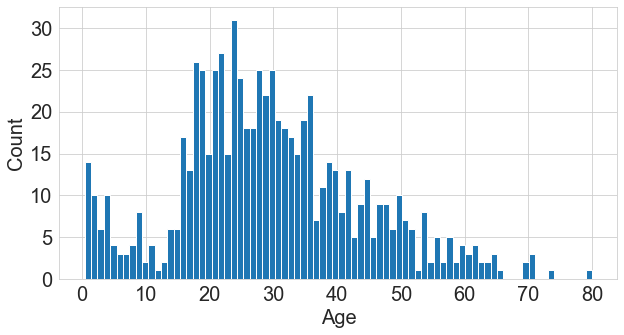

In [244]:
# show the distribution of age of all the passengers

titanic_df['Age'].hist(bins=80,figsize = (10,5))
plt.xlabel('Age',fontsize = 20)
plt.ylabel('Count',fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

The histogram above shows, the Age distribution of the passengers. We can see that majority of the passengers were age range 20 to 40. 

In [245]:
#average age of the passengers
titanic_df['Age'].mean()

29.69911764705882

In [246]:
# show the breakdown of the passengers
titanic_df['Person'].value_counts()

male            537
female          271
female_child     43
male_child       40
Name: Person, dtype: int64

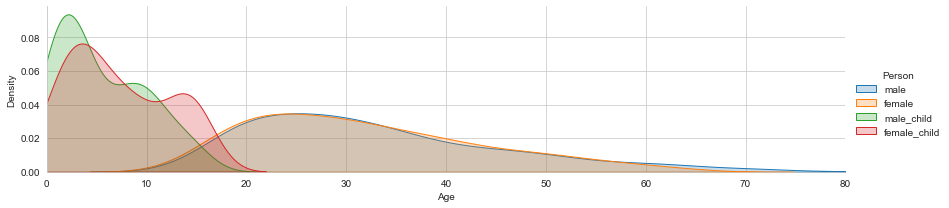

In [247]:
# using a kdeplot to show the four categories of persons(male,female,male_child,female_child) with respect to their age
fig = sns.FacetGrid(titanic_df, hue='Person', aspect=4)
fig.map(sns.kdeplot, 'Age',shade=True)

oldest = titanic_df['Age'].max()
fig.set(xlim =(0,oldest))

fig.add_legend()

The plot above is a Kernel Density Estimate(KDE) Plot, to show a curve of the distribution of "Age with respect to Person".

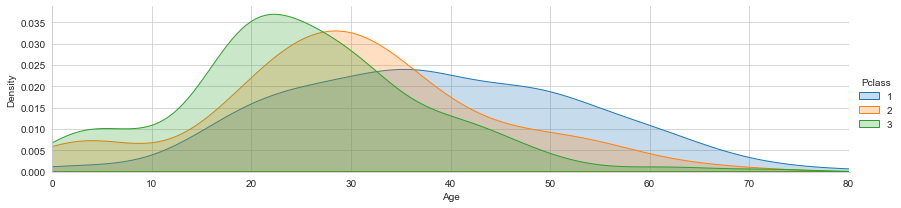

In [248]:
# plot a kdeplot for Pclass
fig = sns.FacetGrid(data=titanic_df, hue='Pclass', aspect=4)
fig.map(sns.kdeplot, 'Age',shade=True)

oldest = titanic_df['Age'].max()
fig.set(xlim =(0,oldest))
fig.add_legend()

Again, the Kernel Density Estimate(KDE) Plot showing a curve of the distribution of Age within the 3 different Pclass. 
note: KDE plot helps to visualize distribution among large datasets and they show relative distribution, meaning the proportion of the dataset that amounts to a total of 1 or 100%. This plot shows that class 3 is more dense in population.

# 2. What deck were the passengers on?

In [249]:
titanic_df['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [250]:
print(titanic_df.shape)
titanic_df.head()

(891, 13)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


The first letter of the cabin represents which deck they are on and we are curious to know how the distribution is like within the decks

In [251]:
# drop NaN from the cabin column 
deck = titanic_df['Cabin'].dropna()
deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

In [252]:
iso = []

#to get the first alphabet of the cabin column
for x in deck:
    iso.append(x[0])
    
#print(iso)
new_cabin_df = pd.DataFrame(iso)
new_cabin_df.columns= ['Cabin']

<AxesSubplot:xlabel='Cabin', ylabel='count'>

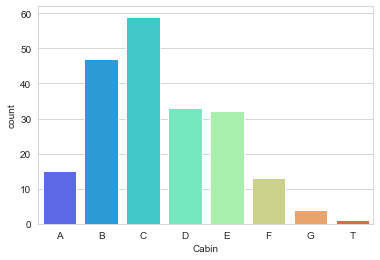

In [253]:
#plot the categorical plot base on the different type of cabin they are in
sns.countplot(x='Cabin',data=new_cabin_df.sort_values('Cabin'),palette='rainbow')

I dropped the null values first and grab the first letter of the cabin column using a for loop and was stored inside a list.
A new data frame was then created base on the list. Then, I plotted it with a catplot and added a rainbow palette for an improved visual. Therefore, most of the passengers were in cabin B and C and not many of them were staying in cabins F,G and T.

In [254]:
new_cabin_df.value_counts()

Cabin
C        59
B        47
D        33
E        32
A        15
F        13
G         4
T         1
dtype: int64

# 3. Find the passengers information i.e their location and distribution with respect to class and person? 

<AxesSubplot:xlabel='Embarked', ylabel='count'>

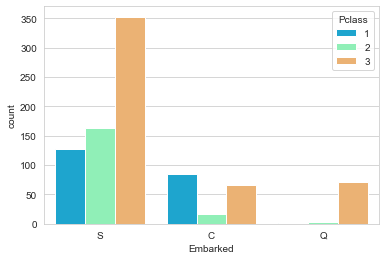

In [255]:
# s = Southampton, c = Cherboug, q = Queenstown
#plot to show how passengers are distributed in the 3 classes
sns.set_style('whitegrid')
sns.countplot(x='Embarked', data=titanic_df, hue='Pclass', palette='rainbow')


<AxesSubplot:xlabel='Embarked', ylabel='count'>

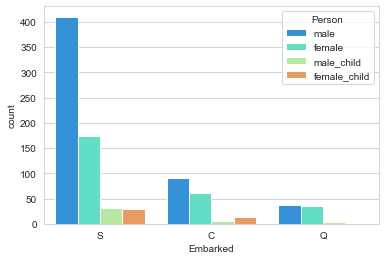

In [256]:
#plot to show the type of the passengers or persons(male,male_child, female, femlae_child) from each city
sns.set_style('whitegrid')
sns.countplot(x='Embarked', data=titanic_df, hue='Person', palette='rainbow')

Majority of the passengers(persons) came from southamptom and are much present in class 1,2,3. Followed by those from chebourg, more of the passengers from Queenstown are present in class 3.

# 4. Who were the passengers alone and who were those with family?

In [257]:
# created a column(Family_Member) to define passengers who are alone OR with family
# while values greater than zero means they had a family (sibiling,spouse,parents,child)
# values of zero means they are alone

titanic_df['Family_Member'] = titanic_df['SibSp'] + titanic_df['Parch']

# rename the 0 = 'alone' and 'greater than 0' ='with family' 
titanic_df['Family_Member'].loc[titanic_df.Family_Member>0] = 'With Family'
titanic_df['Family_Member'].loc[titanic_df.Family_Member==0] = 'Alone'
titanic_df.head(891)

C:\Users\BUYPCCOMPUTERS\AnacondaAviro\AviroPC\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Family_Member
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.2500,NaN,S,male,With Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.2833,C85,C,female,With Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.1000,C123,S,female,With Family
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.0500,NaN,S,male,Alone
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male,Alone
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.00,0,0,17463,51.8625,E46,S,male,Alone
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.00,3,1,349909,21.0750,NaN,S,male_child,With Family
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.00,0,2,347742,11.1333,NaN,S,female,With Family
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.00,1,0,237736,30.0708,NaN,C,female_child,With Family


In [258]:
# total passengers with family members
titanic_df.loc[titanic_df['Family_Member']=='With Family'].shape

(354, 14)

In [259]:
# total passengers Alone
titanic_df.loc[titanic_df['Family_Member']=='Alone'].shape

(537, 14)

<AxesSubplot:xlabel='Family_Member', ylabel='count'>

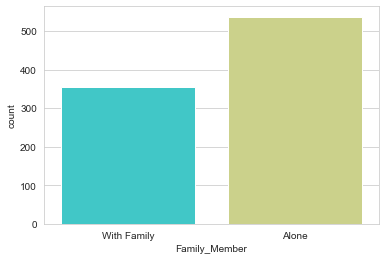

In [260]:
# visual plot of Family_Member alone and those with family
sns.set_style('whitegrid')
sns.countplot(x='Family_Member',data=titanic_df, palette='rainbow')

From the plot, we can see that we had a total of 354 persons with family members and a total of 537 passengers without family member (alone). Hence, if having a family member increases the likelyhood of survival. Therefore, most of the passengers who died were alone.

# 5. What factors helped someone survive the sinking?

<AxesSubplot:xlabel='Survived', ylabel='count'>

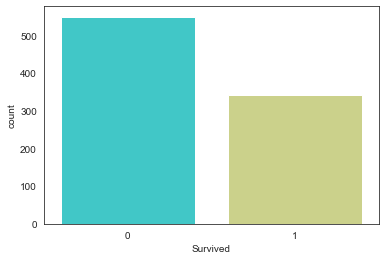

In [261]:
# count plot of the survived column
sns.set_style('white')
sns.countplot(x='Survived', data= titanic_df, palette='rainbow')

In [262]:
# cross plot of sex vs survived column
pd.crosstab(titanic_df['Sex'],titanic_df['Survived'])

Survived,0,1
Sex,,
female,81,233
male,468,109


The overview of the survival rate. Sadly shows that there are lesser passengers that survived the Titanic crash.

<AxesSubplot:xlabel='Survived', ylabel='count'>

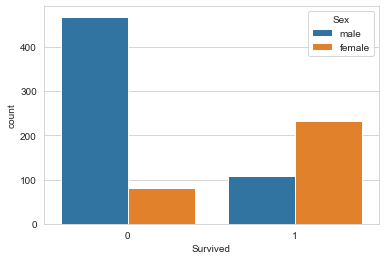

In [263]:
# count plot of survived column, and sex column as hue

sns.set_style('whitegrid')
sns.countplot(x='Survived', data=titanic_df, hue='Sex')

The following plot agree with the result from the crosstab above, to show the breakdown of the gender against the survival rate. Amazingly, more than 80% of the male passengers died and more than 70% of the female passengers survived even though there are a lot more males as compared to females. What could have been the reason? It could be that most of the male passengers gave their lives saving the female passengers. 

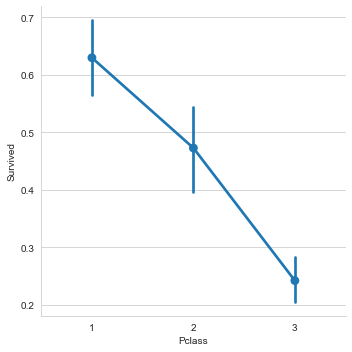

In [264]:
# catplot of pclass, survived column
sns.catplot(x='Pclass',y='Survived', data=titanic_df, kind='point')

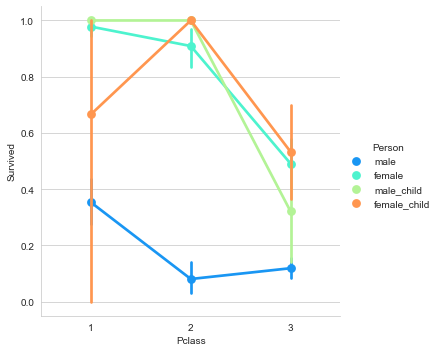

In [265]:
# plot to see the trend of chances of survival with respect to class
sns.catplot(x='Pclass',y='Survived', data=titanic_df, hue='Person', kind='point',palette='rainbow')

A factor plot was used to visualize the survival rate of the ‘person’ and ‘Pclass’ column. To breakdown the analysis.
1.	A male passenger has a less than 50% survival rate and the highest rate of survival was in class 1 of 30–40%.
2.	A female passenger has the greatest survival rate of 90% if she is in class 1 and has the lower chance survival survive in     class 3 with a chance of only about 40–60%.
3.	For children (male_child and female_child) who are below the age of 16, they would survived if they are in class 2.


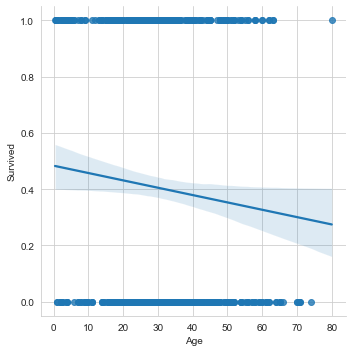

In [266]:
# implot to see the age vs survivor
sns.lmplot(x='Age',y='Survived', data=titanic_df)


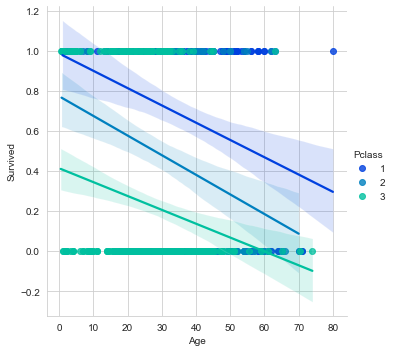

In [267]:
# add in the class to the age vs survivor

sns.lmplot(x='Age',y='Survived', data=titanic_df, hue='Pclass',palette='winter')


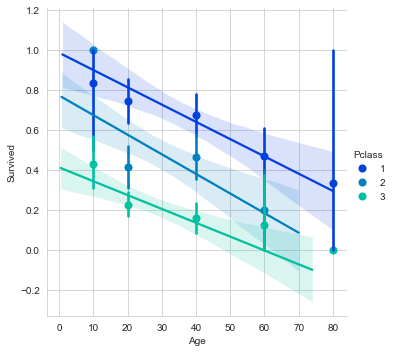

In [268]:
generations =[10,20,40,60,80,90]
sns.lmplot(x='Age',y='Survived', data=titanic_df, hue='Pclass',palette='winter',x_bins=generations)


The factor plot above shows the data from the ‘Age’ and ‘Pclass’ column. Base on this factor plot, a passenger is more likely to survived at class 1 with age ranging from 10 to 20 years old.

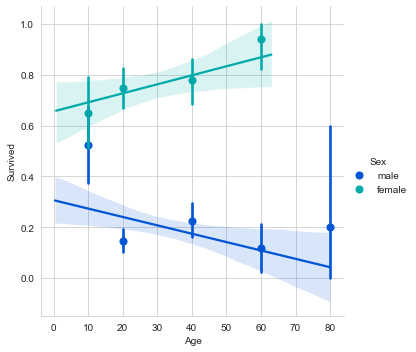

In [269]:
sns.lmplot(x='Age',y='Survived',hue='Sex',data=titanic_df, palette='winter',x_bins=generations)

The next factor plot shows the data from the ‘Age’ and ‘Pclass’ column. Base on this factor plot, a passenger is more likely to survived at class 1 with age ranging from 10 to 20 years old.

# 6. Did having a family member increase the chances of surviving the crash?

In [270]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Family_Member
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone


In [271]:
# cross column plot to show the chances of survival
pd.crosstab(titanic_df['Family_Member'],titanic_df['Survived'])

Survived,0,1
Family_Member,,
Alone,374,163
With Family,175,179


In [272]:
# chances of surviving alone
Total_alone = 374+163
survived_alone = 163
percentage = 100
chances_alone = (survived_alone/Total_alone) * percentage
chances_alone

30.353817504655495

In [273]:
# chances of surviving with family member
Total_with_family = 175 + 179
survived_with_family = 179
percentage = 100
chances_with_family = (survived_with_family/Total_with_family) * percentage
chances_with_family

50.56497175141242

<AxesSubplot:xlabel='Survived', ylabel='count'>

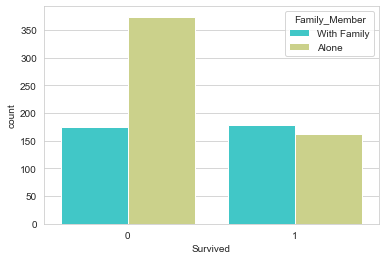

In [274]:
# plot of Family_Member column vs survived column 
sns.set_style('whitegrid')
sns.countplot(x='Survived', data=titanic_df, hue='Family_Member', palette='rainbow')

From the plot we can see that those who came alone has about 30% to 70% survival to death rate, while those with family has about 50 to 50% survival to death rate.Therefore, having a family member increases the chances of surviving.

# 7. Did the deck have an effect on the passengers survival rate?

In [275]:
# drop na values in the cabin column
titanic_df = titanic_df.dropna(subset=['Cabin'])

In [276]:
# isolated the first letter of the cabin column to represent the deck and used for further analysis
titanic_df['Deck'] = titanic_df['Cabin'].astype(str).str[0]

# need to reset index first and then create a column called Deck
titanic_df=titanic_df.reset_index(drop=True)
titanic_df.head()

C:\Users\BUYPCC~1\AppData\Local\Temp/ipykernel_9416/2256054017.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_df['Deck'] = titanic_df['Cabin'].astype(str).str[0]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Family_Member,Deck
0,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family,C
1,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family,C
2,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male,Alone,E
3,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,female_child,With Family,G
4,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,female,Alone,C


<AxesSubplot:xlabel='Deck', ylabel='count'>

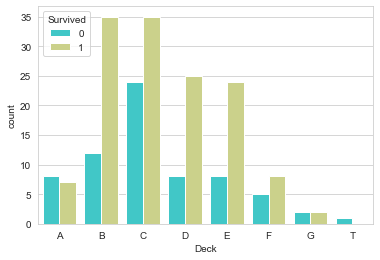

In [277]:
# plot a cat plot for deck vs survived to see which deck has a higher survivor rate

sns.countplot(x='Deck',data=titanic_df.sort_values('Deck'),  hue='Survived', palette='rainbow')

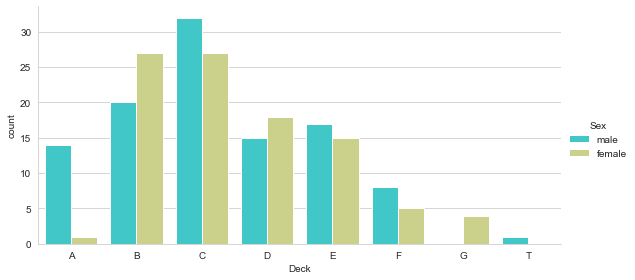

In [278]:
# plot a cat plot for deck vs sex 

sns.catplot(x='Deck',hue='Sex',data=titanic_df.sort_values('Deck'),kind='count',palette='rainbow', height= 4, aspect =2)

C:\Users\BUYPCCOMPUTERS\AnacondaAviro\AviroPC\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


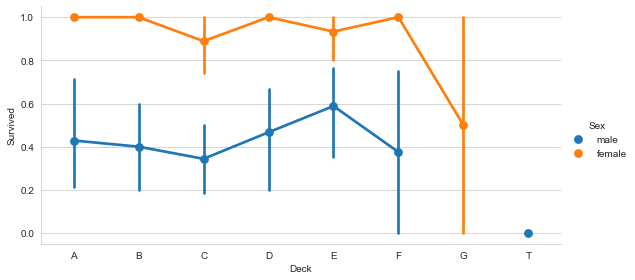

In [279]:
# plot to see if a male or female in a certain will have a higher survival rate
sns.factorplot(x='Deck',y='Survived', data=titanic_df.sort_values(['Deck']), hue='Sex', height= 4, aspect= 2)


Conclusion;
A lot has been done here, From understanding the data to diving into a deeper analysis as to who is more likely to survived the Titanic crash.
Base on the analysis so far, these were the insights that we have gathered:
1.	There were more male than female passengers onboard. Yet, more female passengers survived the crash.
2.	Since the first letter of the cabin column represent the deck. Therefore, a female passenger in her 20's and with a family and also staying in deck A or B and the passenger class 1, has the highest chance to survive the crash.
3.	A male passenger that came alone would most likely not survived the crash.
4. Most of the passengers were in cabin B and C and not many of them were staying in cabins F,G and T.